In [6]:
import pickle 
with open(f"opt_5bit/dataset_5.pkl", "rb")as f:
    train_dataset, validation_dataset, test_dataset = pickle.load(f)

In [7]:
import numpy as np
total_dataset = np.concatenate([train_dataset, validation_dataset, test_dataset])

In [8]:
from plot.plot import plot_correlation

/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/luliqiang/miniconda3/envs/jax-cpu/lib/python3.8/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, 

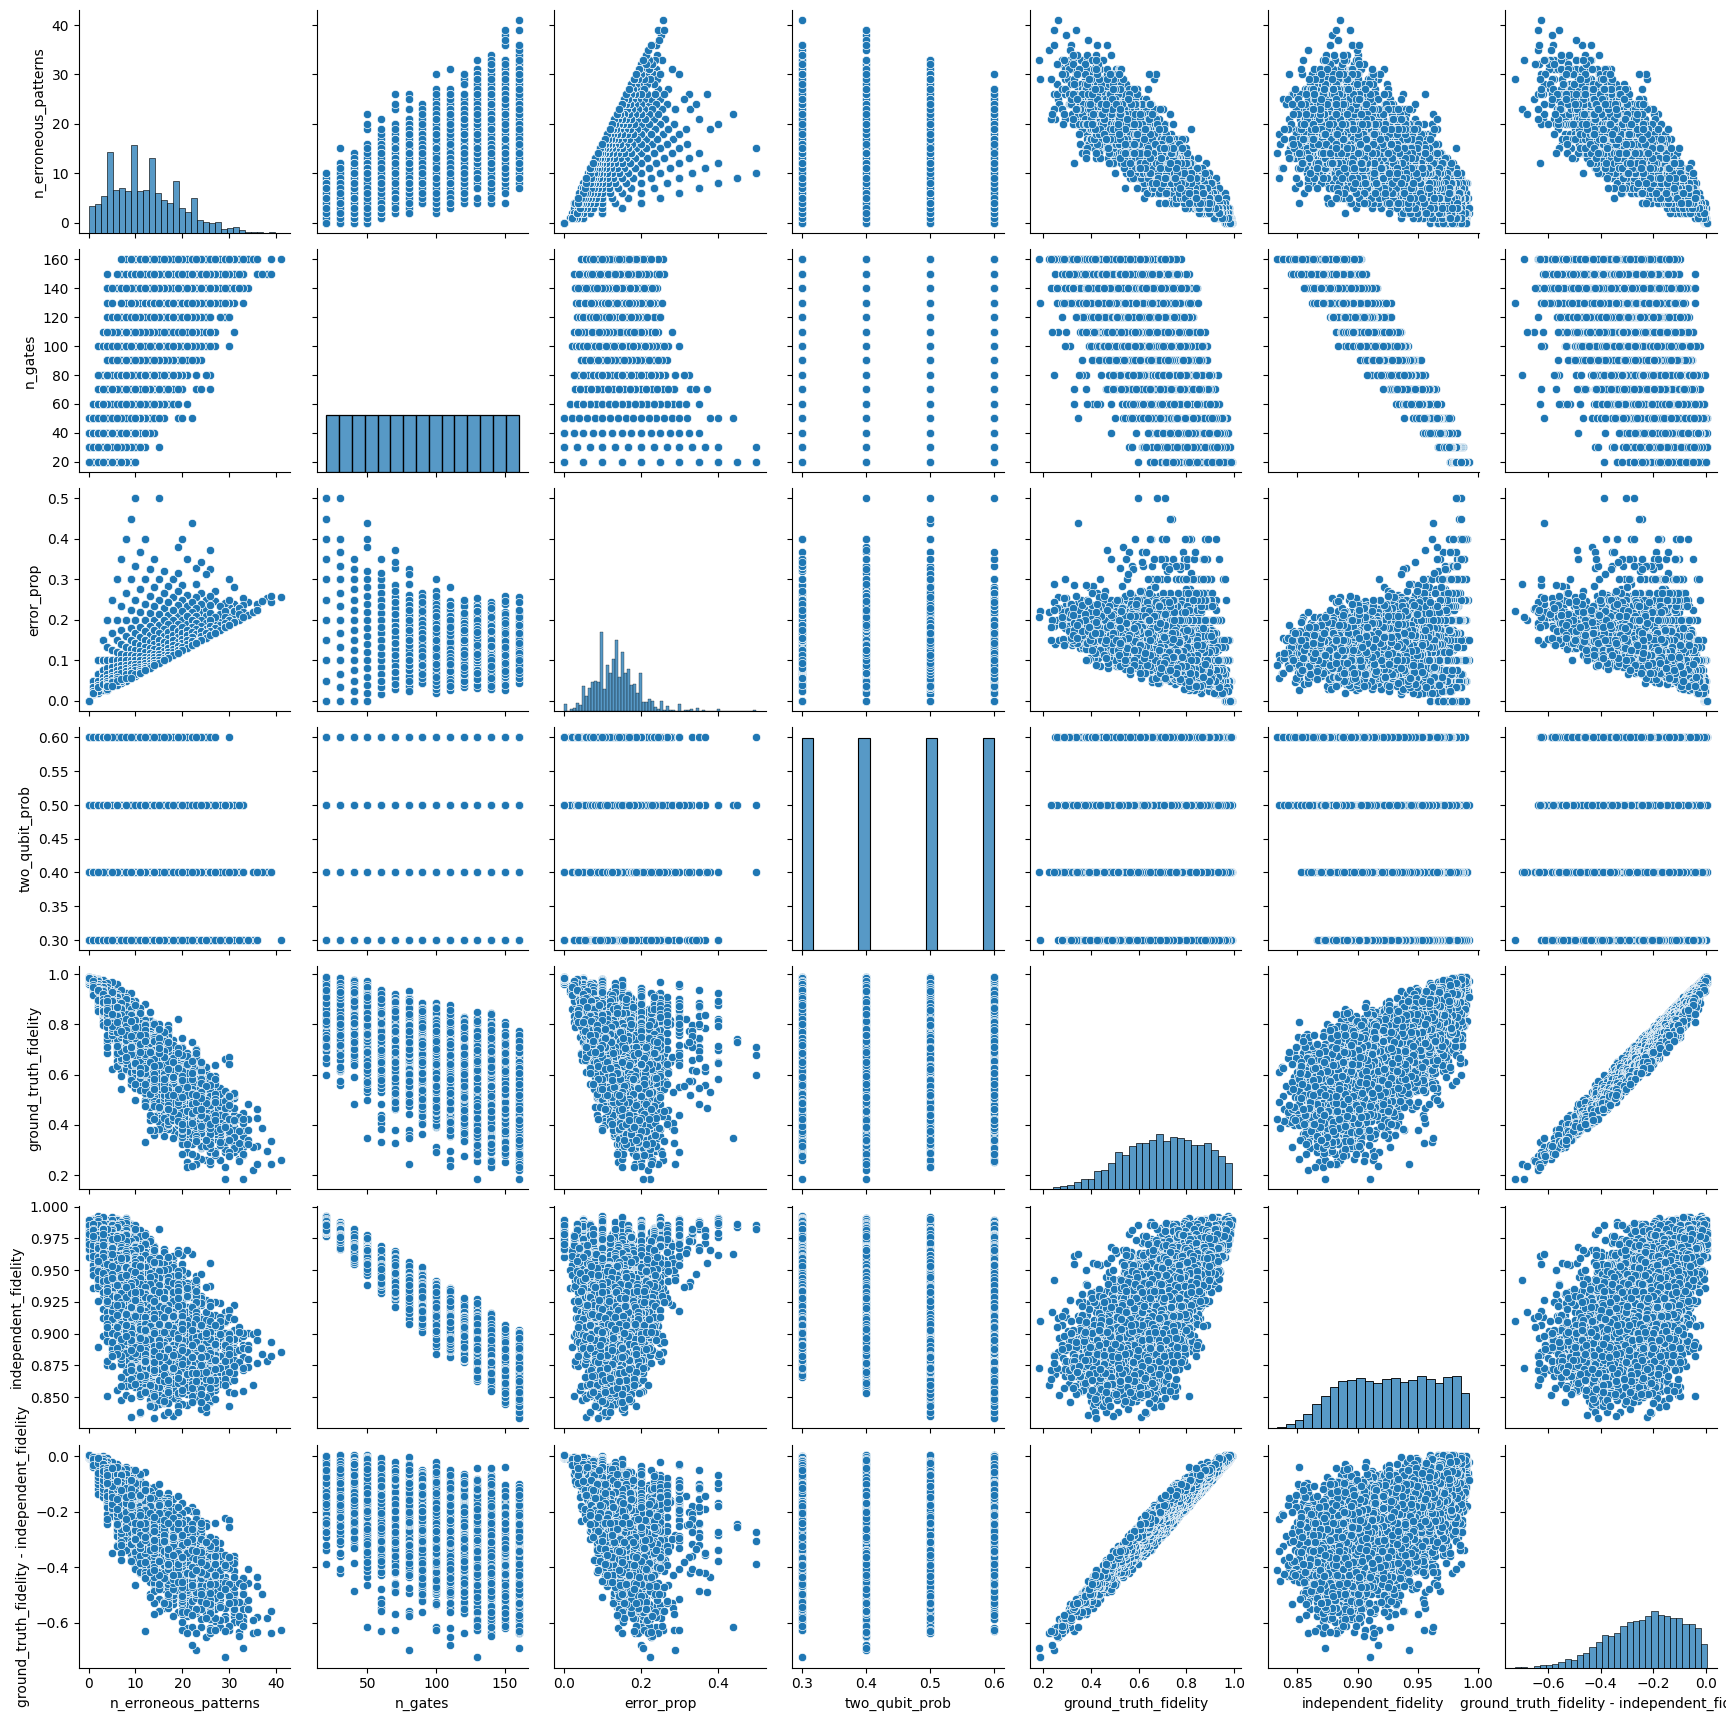

In [9]:
error_data = []
for circuit_info in total_dataset:
    error_data.append([circuit_info['n_erroneous_patterns'], len(circuit_info['gates']),
                      circuit_info['n_erroneous_patterns'] / len(circuit_info['gates']), circuit_info['two_qubit_prob'],
                      circuit_info['ground_truth_fidelity'], circuit_info['independent_fidelity'], circuit_info['ground_truth_fidelity'] - circuit_info['independent_fidelity']
                    ])

error_data = np.array(error_data)
plot_correlation(error_data, ['n_erroneous_patterns',
                 'n_gates', 'error_prop', 'two_qubit_prob', 'ground_truth_fidelity', 'independent_fidelity', 'ground_truth_fidelity - independent_fidelity'], None)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


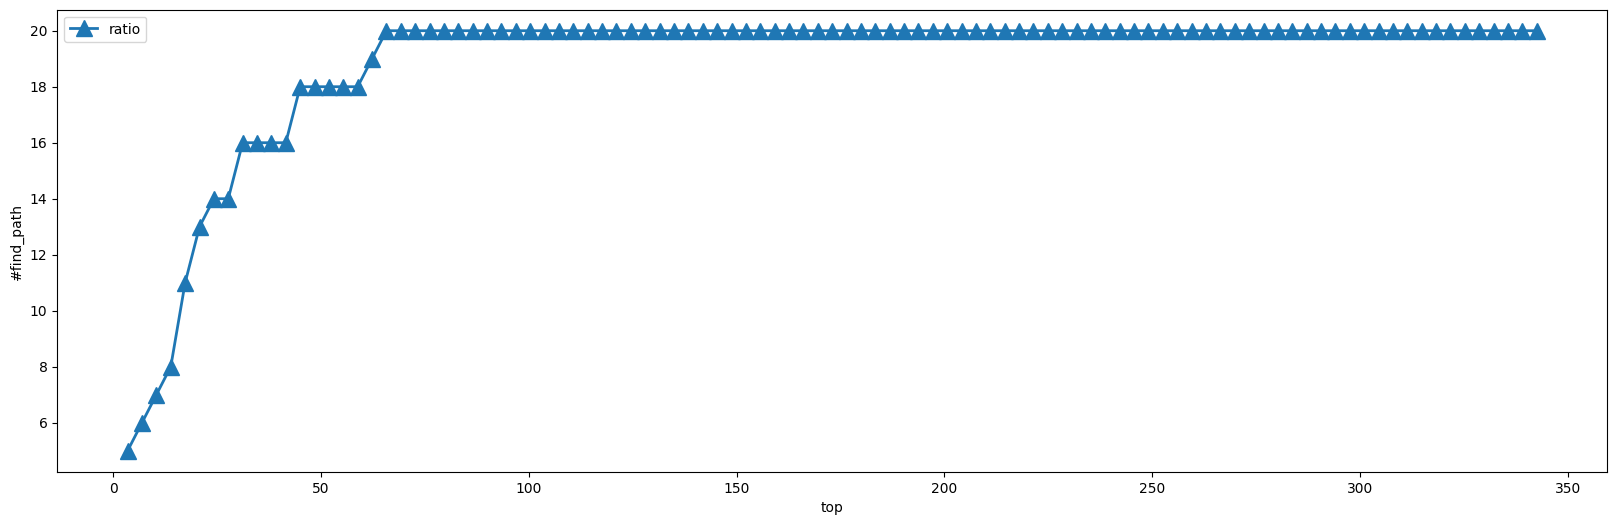

In [1]:
import pickle

from plot.plot import find_error_path 
with open(f"opt_5bit/error_params_predicts_5.pkl", "rb")as f:
    downstream_model, predicts, reals, durations, _ = pickle.load(f)
    
find_error_path(downstream_model.upstream_model, downstream_model.error_params['gate_params'],name = f"opt_5bit/find_ratio.svg")